# 11.4. Finding points of interest in an image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.feature as sf
%matplotlib inline

In [2]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
    return ax

In [3]:
img = plt.imread('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'child.png?raw=true')

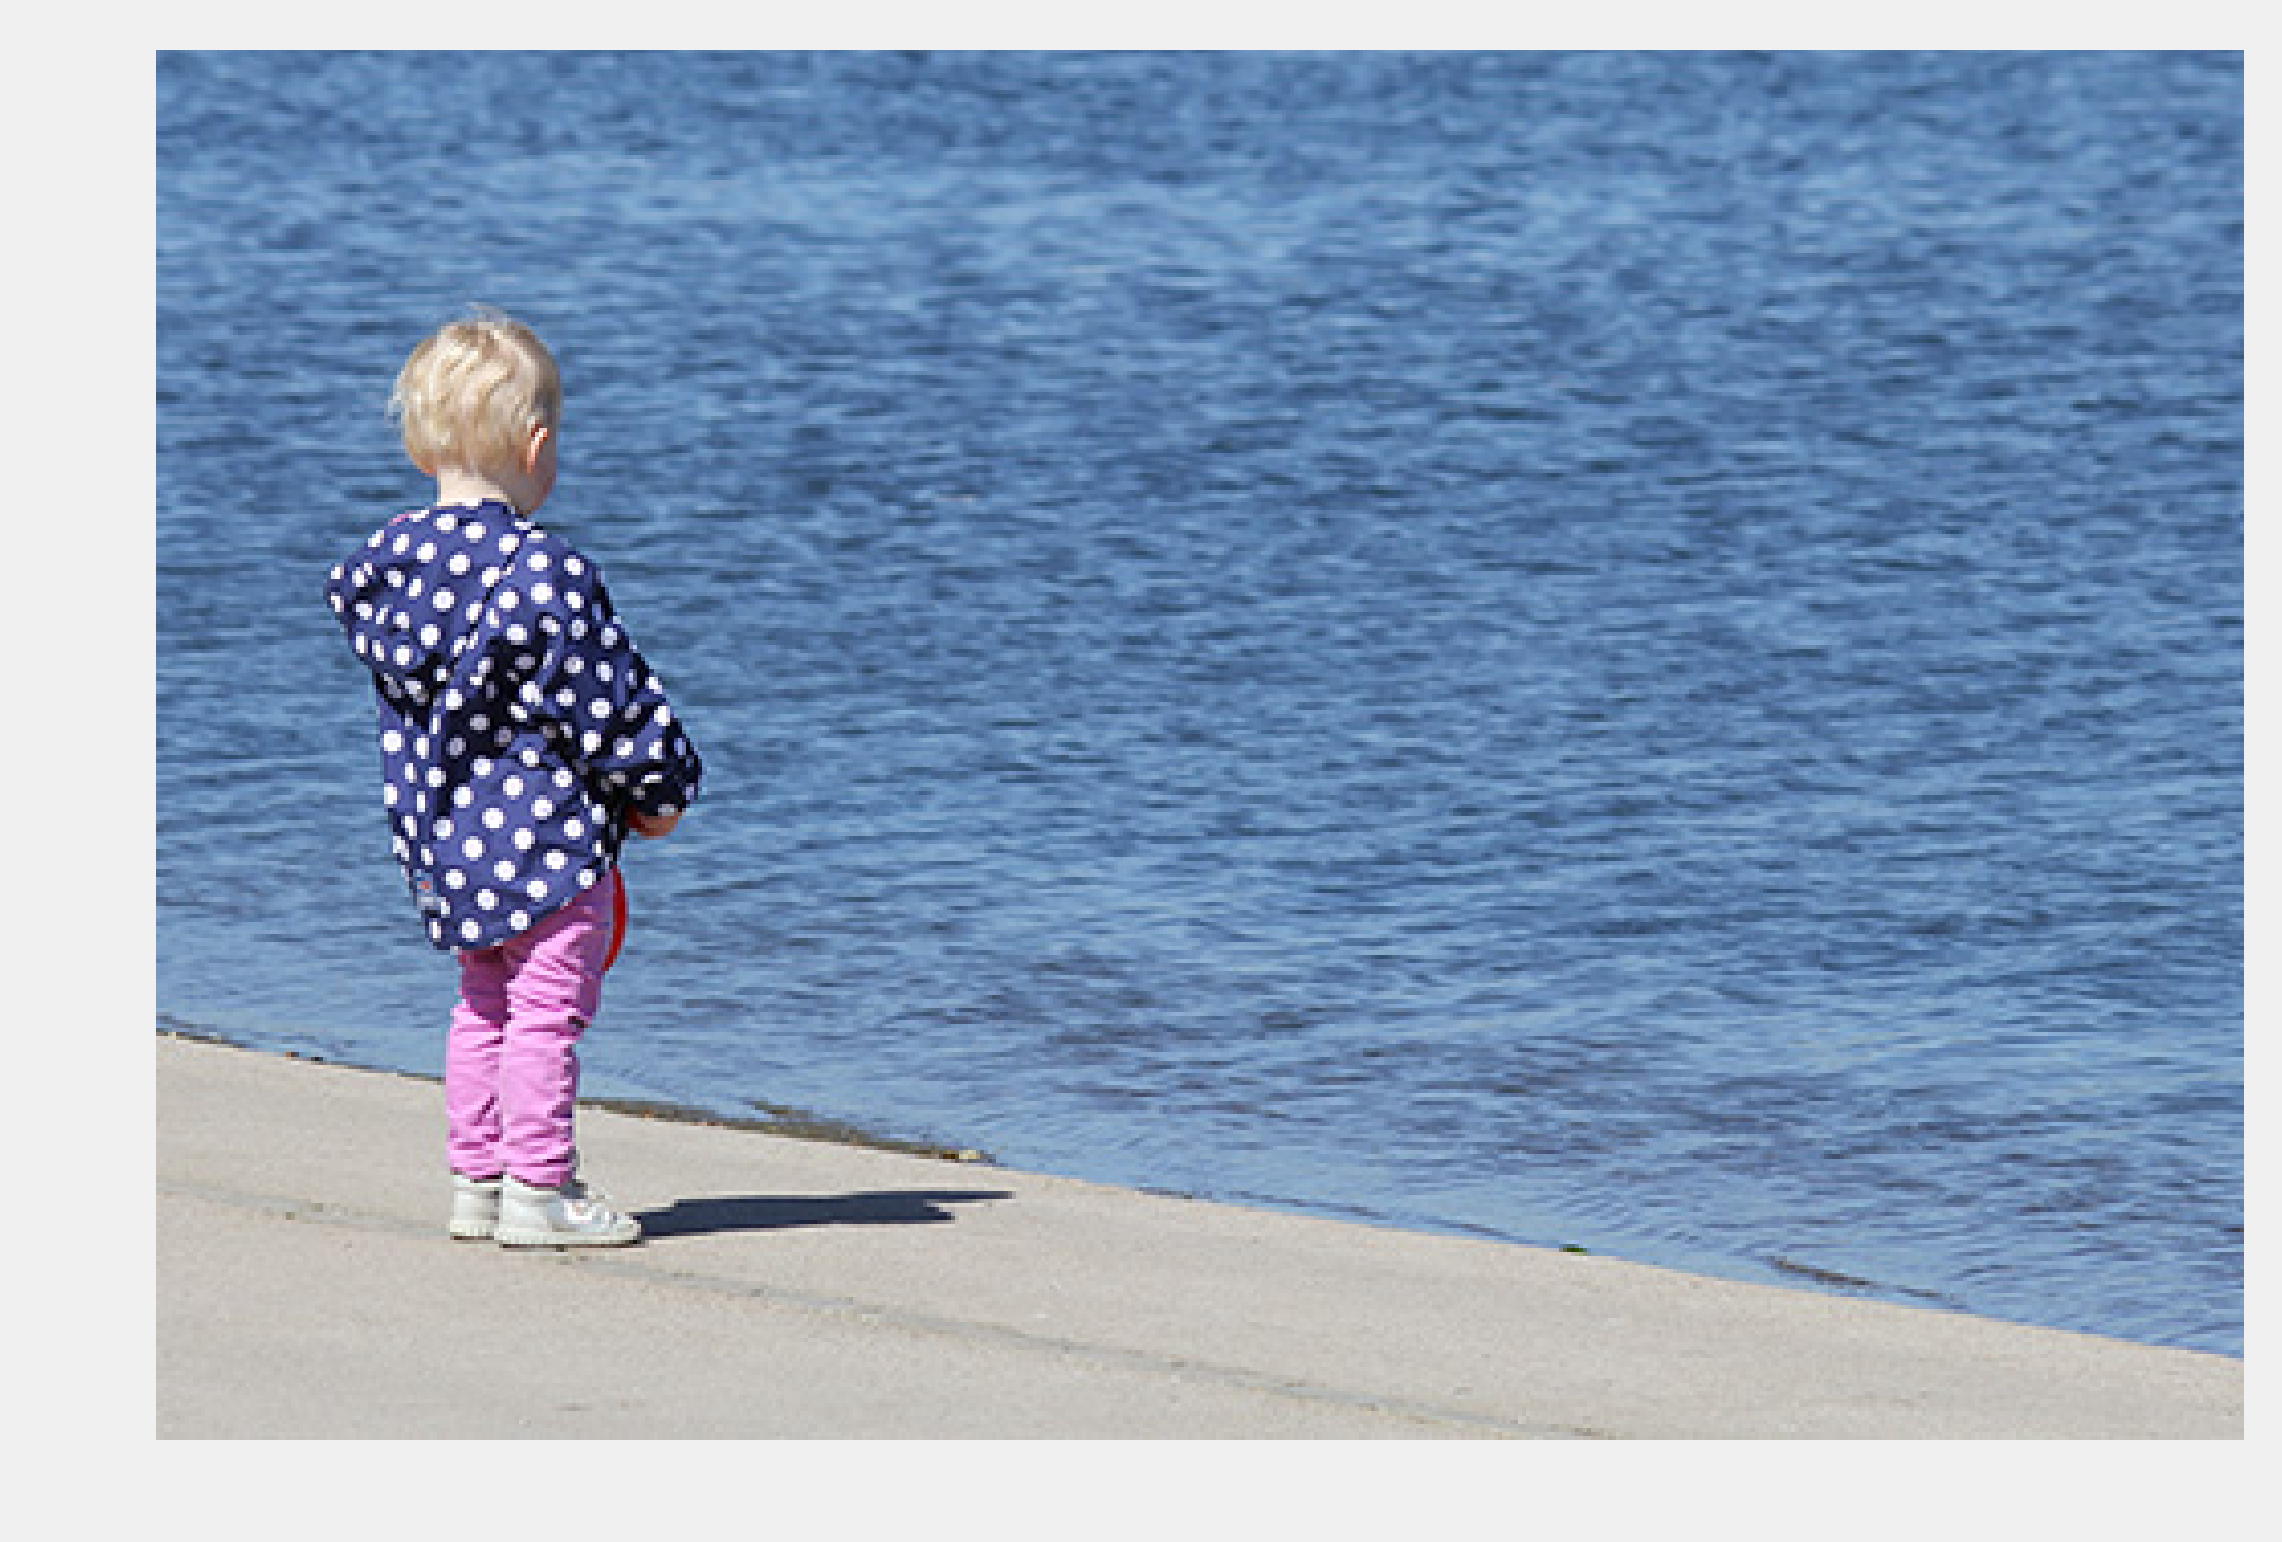

In [4]:
show(img)

In [5]:
corners = sf.corner_harris(img[:, :, 0])

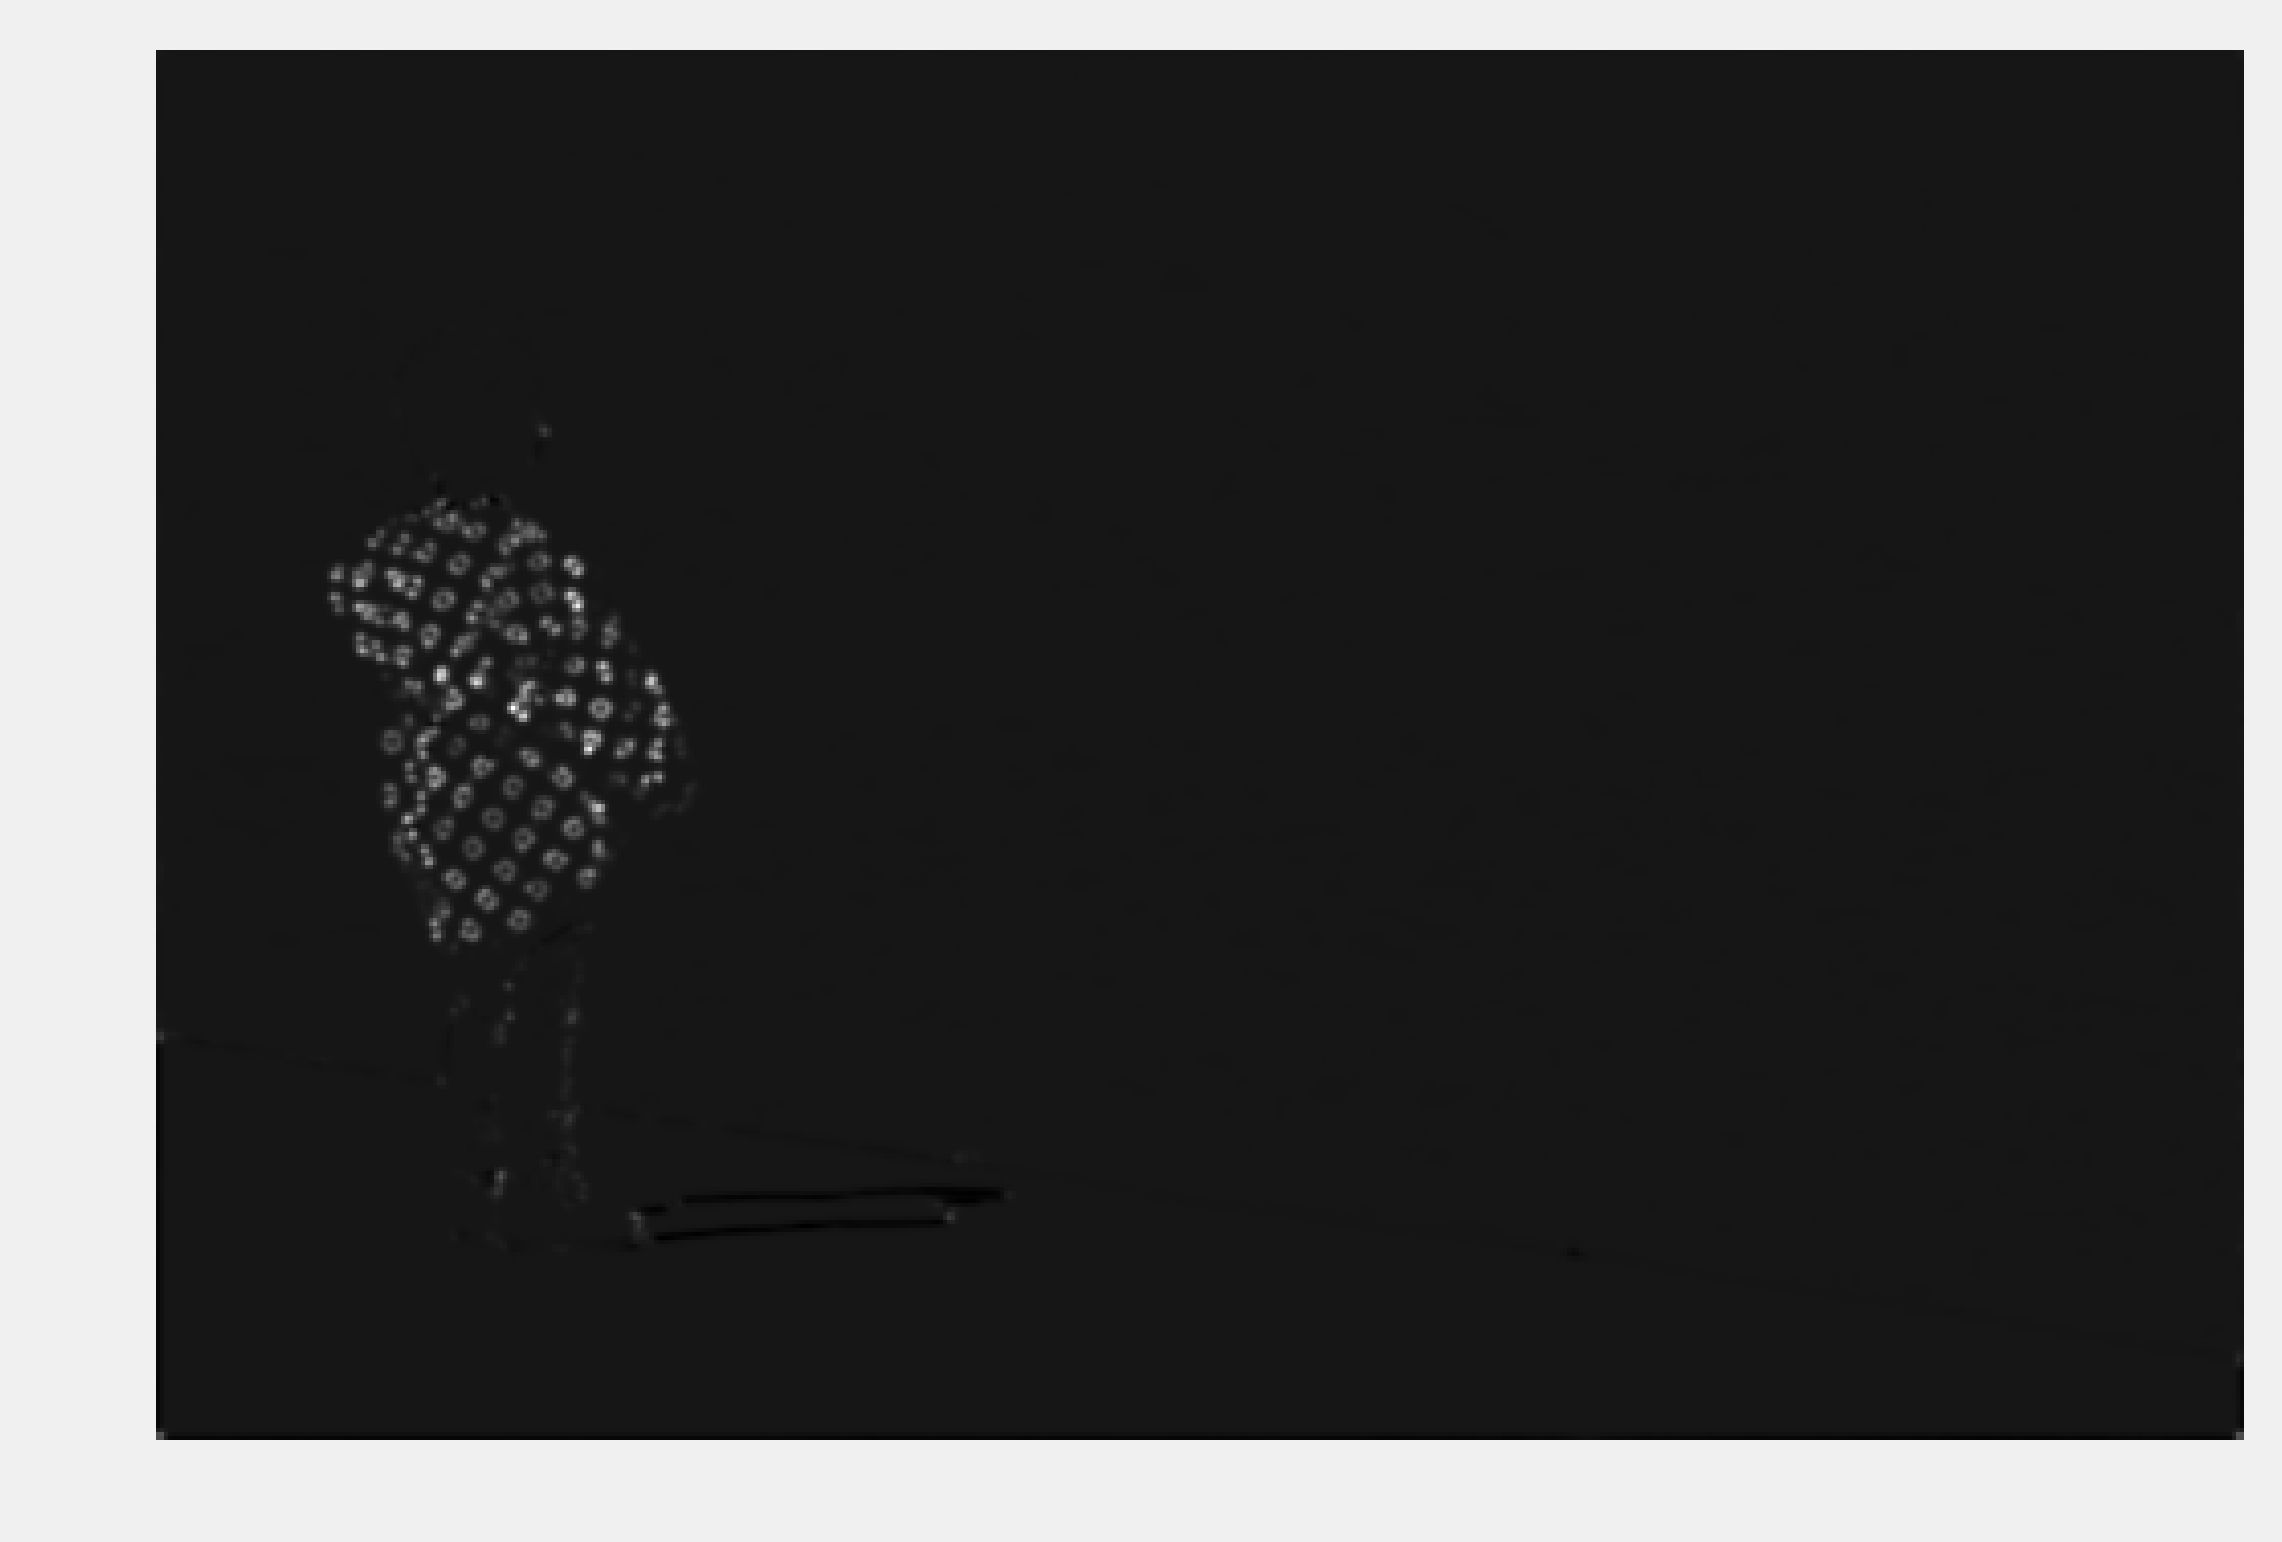

In [6]:
show(corners)

In [7]:
peaks = sf.corner_peaks(corners)

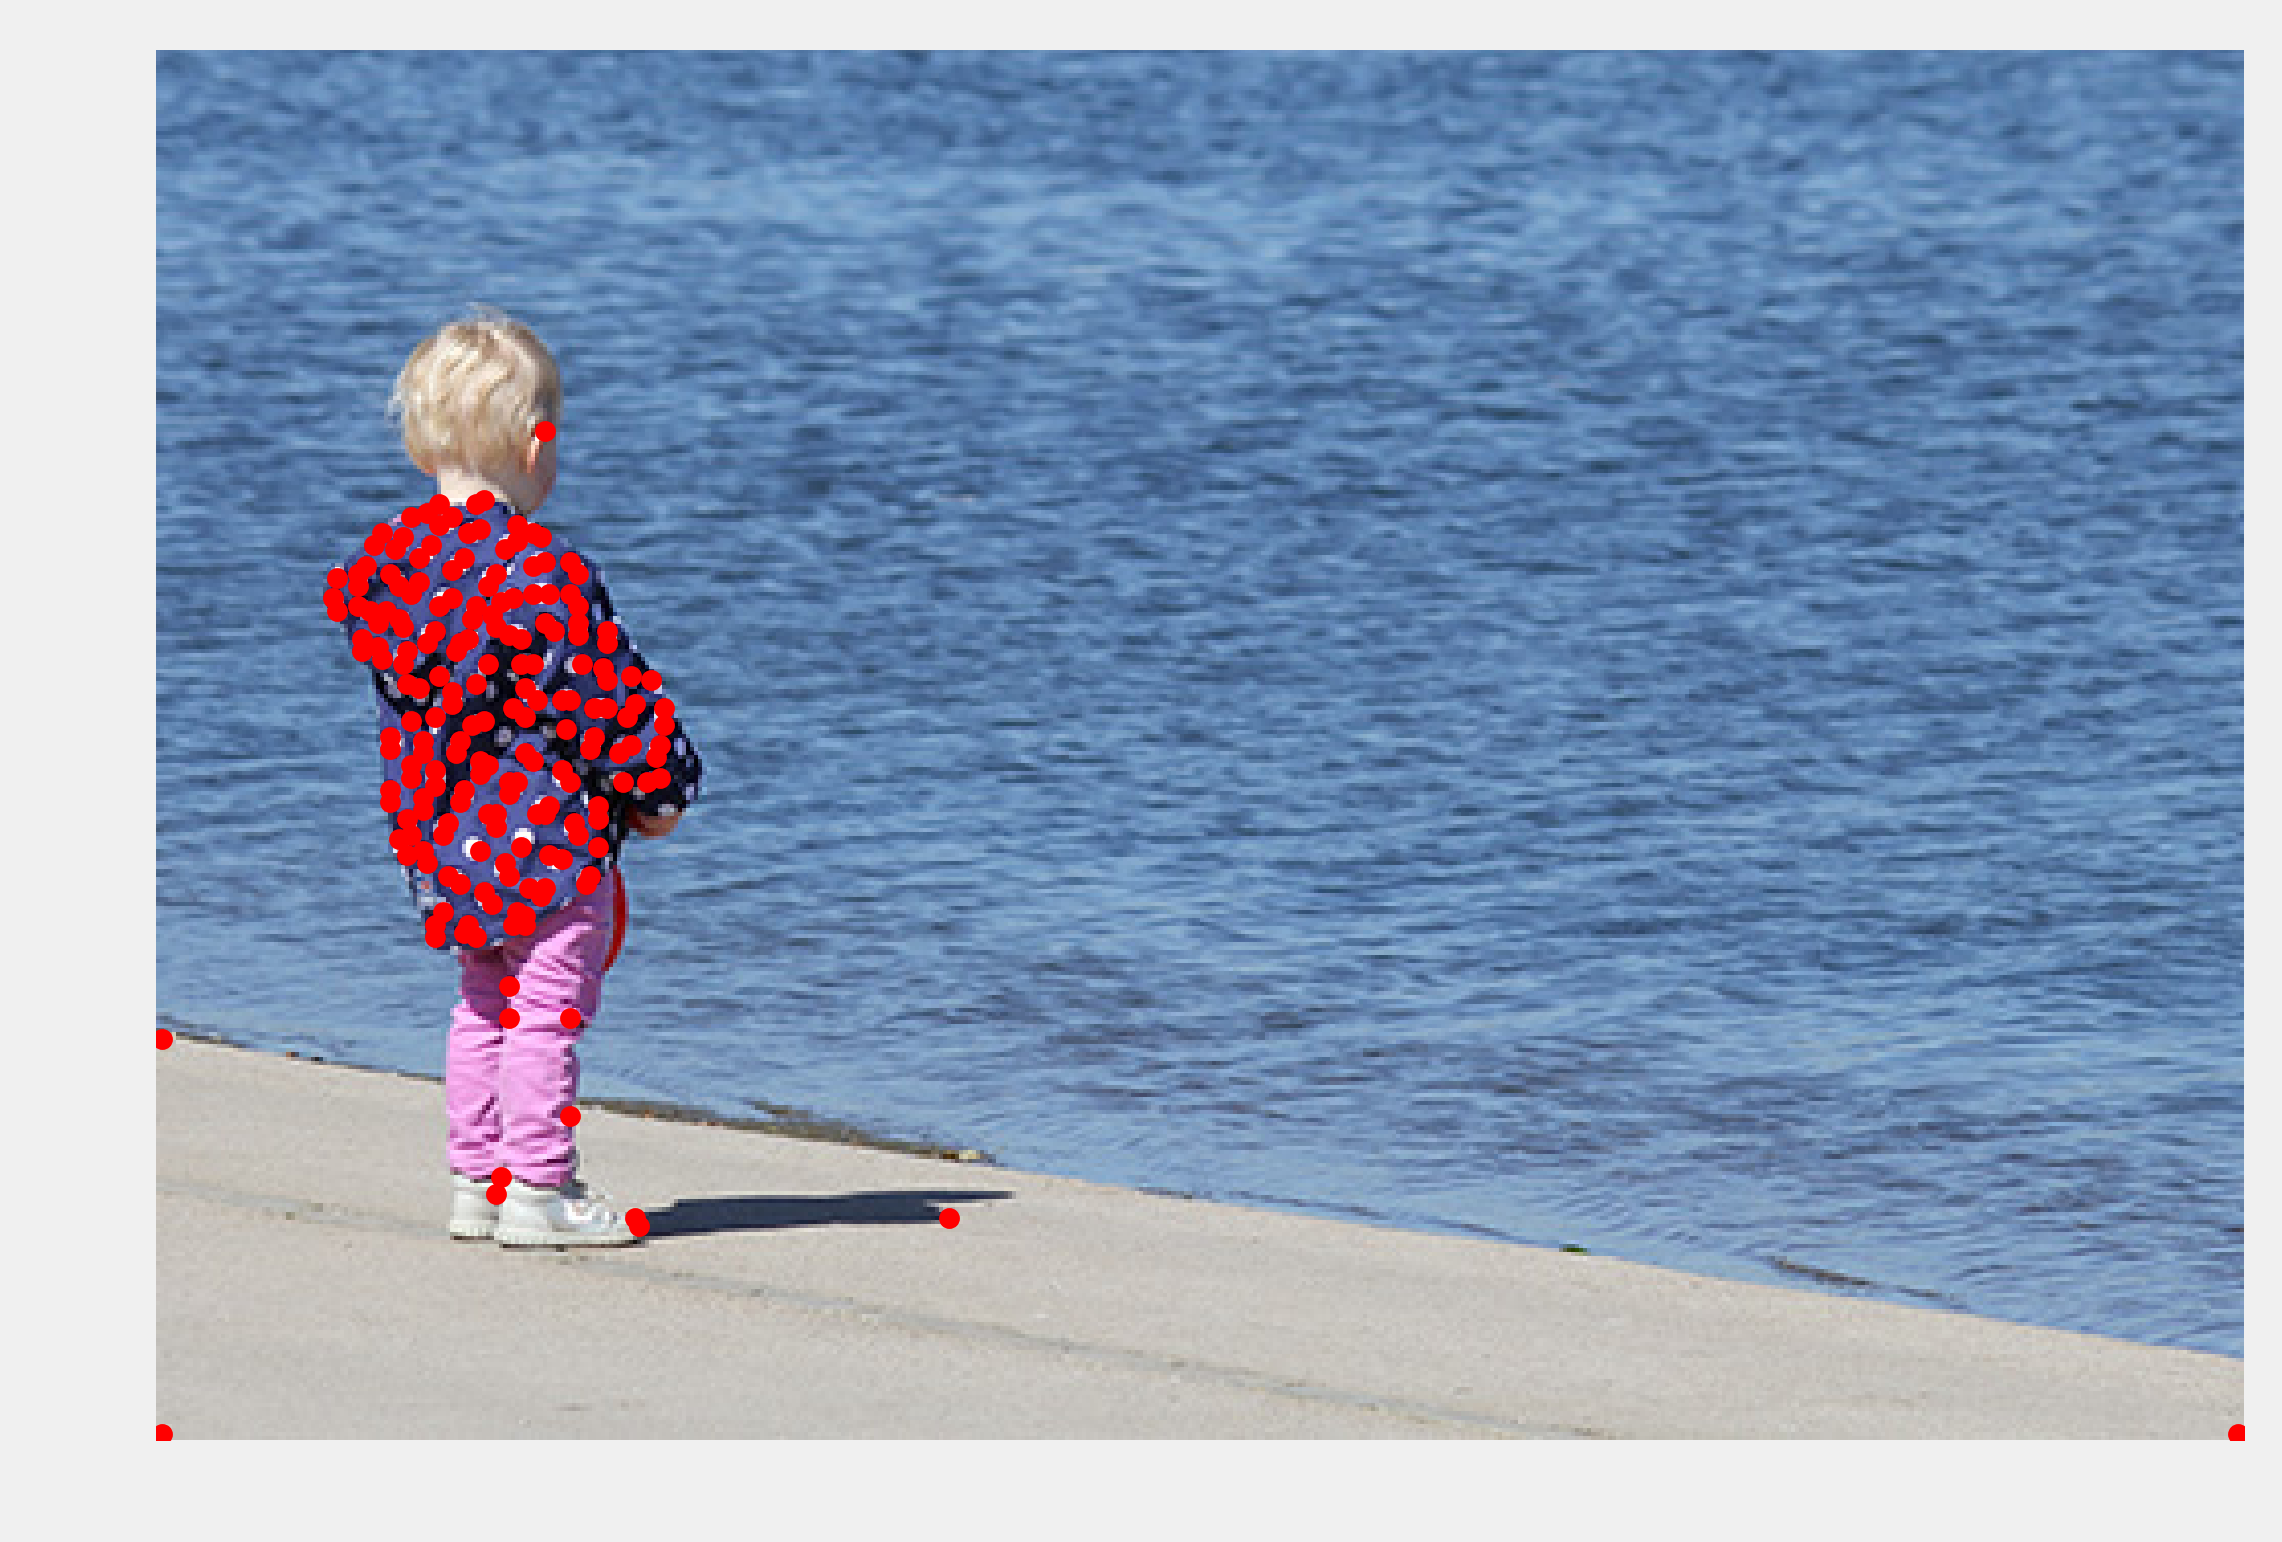

In [8]:
ax = show(img)
ax.plot(peaks[:, 1], peaks[:, 0], 'or', ms=4)

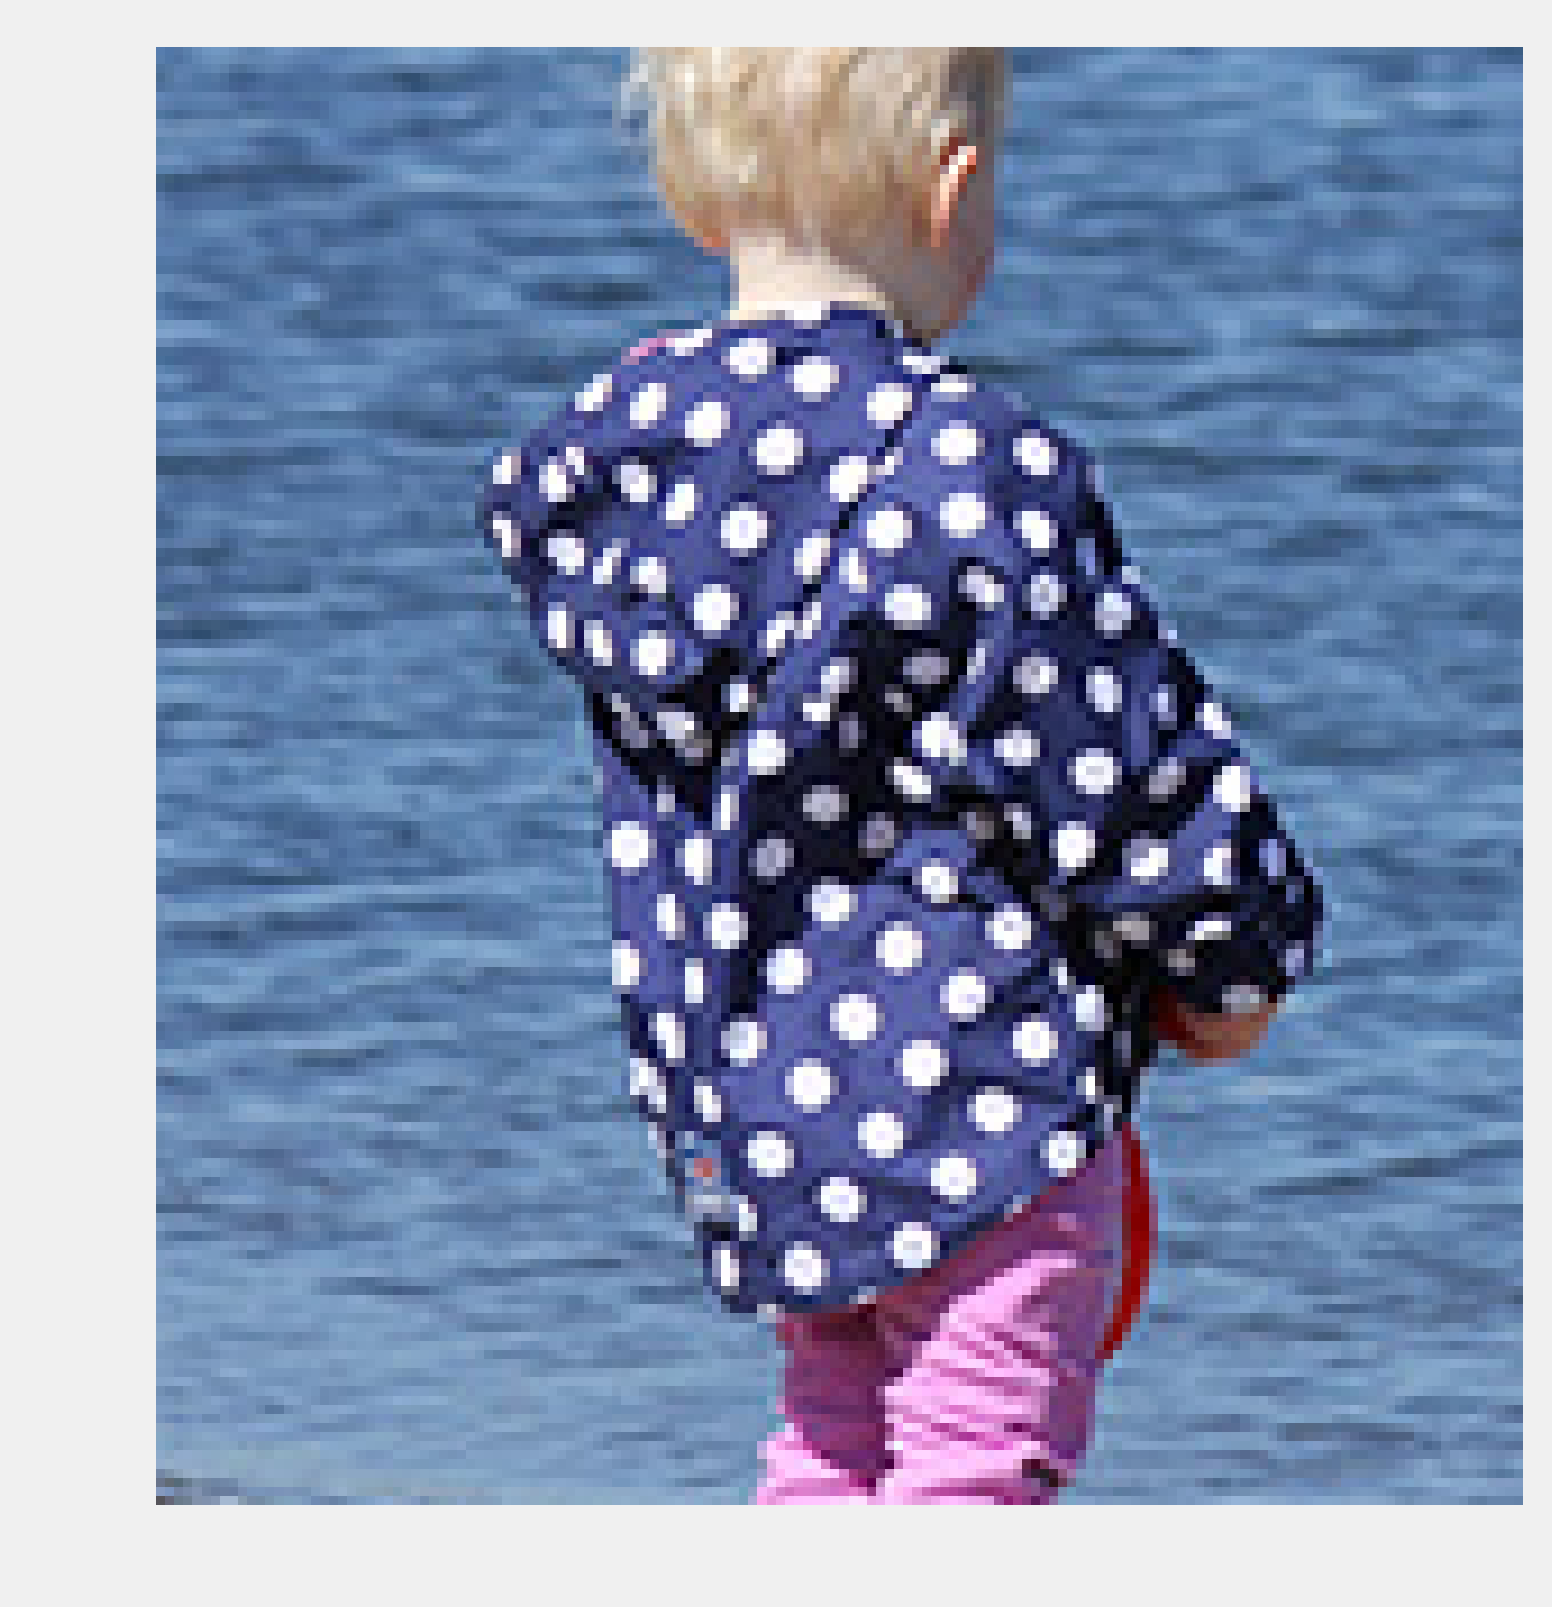

In [9]:
# The median defines the approximate position of
# the corner points.
ym, xm = np.median(peaks, axis=0)
# The standard deviation gives an estimation
# of the spread of the corner points.
ys, xs = 2 * peaks.std(axis=0)
xm, ym = int(xm), int(ym)
xs, ys = int(xs), int(ys)
show(img[ym - ys:ym + ys, xm - xs:xm + xs])